# Data Wrangling Project: WeRateDogs Twitter Data

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy
import json

# Gathering data

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

Twitter API & JSON: Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

## 1) Twitter archive data

In [328]:
twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')
twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## 2) Image Prediction Data:

In [209]:
req = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [210]:
open('image_predictions.tsv', 'wb').write(req.content)

335079

In [211]:
image_prediction = pd.read_csv('image_predictions.tsv', sep = '\t')

## 3) Retweet/Favourite count data

In [17]:
auth = tweepy.OAuthHandler('5Uur0mo4ol2kB8yhtZ1VxXS0u', 'h8E7fSpXWiMoBel7G1ZOAeu4Mgru0v0MtxH5ehYE1RKM89SiBH')
auth.set_access_token('303562412-ct9aNnU0FQR0UKJVn1i1W3Y8omqSewiQWUcRaygB', 'D3qslrbdOU5fqTOp951kOIuZbkeTPBodnjNYoEGFR63Ft')
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [19]:
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in twitter_arch['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

Rate limit reached. Sleeping for: 79


In [22]:
my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)
    
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [175]:
#identify information of interest from JSON dictionaries in txt file
#and put it in a dataframe called tweet JSON
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': int(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])

In [212]:
tweet_json.head(10)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,36269,7724,8780136,16,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,31265,5707,8780136,16,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,23535,3782,8780136,16,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,39550,7869,8780136,16,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,37756,8495,8780136,16,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
5,891087950875897856,19023,2843,8780137,16,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd
6,890971913173991426,11075,1852,8780137,16,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT
7,890729181411237888,61086,17228,8780137,16,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
8,890609185150312448,26184,3919,8780137,16,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
9,890240255349198849,29906,6706,8780137,16,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


### Looking for null values in twitter archive 

In [213]:
twitter_arch.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [214]:
twitter_arch.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [215]:
twitter_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [216]:
print(twitter_arch.doggo.value_counts())
print()
print(twitter_arch.floofer.value_counts())
print()
print(twitter_arch.pupper.value_counts())
print()
print(twitter_arch.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64

None       2346
floofer      10
Name: floofer, dtype: int64

None      2099
pupper     257
Name: pupper, dtype: int64

None     2326
puppo      30
Name: puppo, dtype: int64


In [217]:
print("Tweeted Post: ", twitter_arch.in_reply_to_status_id.notnull().sum())
print("Retweeted Post ", twitter_arch.retweeted_status_id.notnull().sum())

Tweeted Post:  78
Retweeted Post  181


In [218]:
twitter_arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [220]:
with pd.option_context('max_colwidth', 200):
    display(twitter_arch[twitter_arch['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\lenovo-pc\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


## Assessments for quality:

a) There are 23 cases where the denominator of rating != 10. These entries will be removed. It is possible some of these entries are genuine tweets, in which case each of these entries would have to be inspected individually. However, these cases only account for a small fraction of the data set and can be set aside for now. If time allows, I will then inspect the 23 cases in search of genuine tweets.

b) Multiple cases of where the numerator of rating < 10. These entries will be removed.

c) Multiple cases where numerator of rating >> 10. These entries will be assessed and removed if not authentic.

d) Rename columns with more appropriate names: "timestamp" to "tweet_timestamp", "text" to "tweet_text", "rating_numerator" to "dog_rating_out_of_ten", "name" to "dog_name",

e) Since retweets and replies will be removed, the column "retweeted_status_timestamp" will be removed as it will no longer provide any useful information.

f) Remove column "rating_denominator" once all the values that != 10 have been removed since this will no longer provide any useful information.



## Assessments for tidiness:

a) There are 181 retweets which need to be removed. This will ensure there are not two rows corresponding to the same tweet, i.e. holding to the definition of tidy data which requires each row to represent a unique entry.

b) There are 78 tweet replies which need to be removed. This will ensure there are not two rows corresponding to the same tweet, i.e. holding to the definition of tidy data which requires each row to represent a unique entry.

c) Change columns "doggo", "floofer", "pupper", and "puppo" from wide to long format.

In [221]:
image_prediction.head(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [222]:
image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [223]:
pd.concat(g for _, g in image_prediction.groupby("jpg_url") if len(g) > 1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
1033,711694788429553666,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False


In [224]:
print(image_prediction.p1_dog.value_counts())
print(image_prediction.p2_dog.value_counts())
print(image_prediction.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [225]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   int64 
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(5), object(3)
memory usage: 145.8+ KB


In [226]:
tweet_json.isnull().sum()

tweet_id            0
favorite_count      0
retweet_count       0
followers_count     0
friends_count       0
source              0
retweeted_status    0
url                 0
dtype: int64

In [227]:
tweet_json.favorite_count.describe()

count      2331.000000
mean       7572.395538
std       11751.295558
min           0.000000
25%        1320.000000
50%        3295.000000
75%        9273.000000
max      156432.000000
Name: favorite_count, dtype: float64

In [228]:
tweet_json.retweet_count.describe()

count     2331.000000
mean      2708.948949
std       4581.137511
min          1.000000
25%        548.000000
50%       1270.000000
75%       3148.000000
max      77962.000000
Name: retweet_count, dtype: float64

## Quality
Completeness, validity, accuracy, consistency (content issues)

## twitter_arch

Keep original ratings (no retweets) that have images
Delete columns that won't be used for analysis
Erroneous datatypes (doggo, floofer, pupper and puppo columns)
Separate timestamp into day - month - year (3 columns)
Correct numerators with decimals
Correc denominators other than 10:

a. Manually (few examples assessed by individual print text).

b. Programatically (Tweets with denominator not equal to 10 are usually multiple dogs).

## image_prediction

Drop 66 jpg_url duplicated
Create 1 column for image prediction and 1 column for confidence level
Delete columns that won't be used for analysis 

## tweet_json
Keep original tweets only

## Tidiness
Change tweet_id to type int64 in order to merge with the other 2 tables
All tables should be part of one dataset

## Cleaning Data 

In [352]:
twitter_arch_clean = twitter_arch.copy()
image_prediction_clean = image_prediction.copy()

In [353]:
tweet_json_clean = tweet_json.copy()

In [354]:
print(sum(twitter_arch_clean.retweeted_status_user_id.value_counts()))

181


### 1. Twitter archive  

keep original ratings (no retweets) that have images.

Based on info, there are 181 values in retweeted_status_id and retweeted_status_user_id. Delete the retweets. Once I merge twitter_archive and image_prediction, I will only keep the ones with images. 

In [355]:
#CODE: Deleting retweets by filtering NaN of retweeted_status_user_id
twitter_arch_clean = twitter_arch_clean[pd.isnull(twitter_arch_clean['retweeted_status_user_id'])]

#TEST
print(sum(twitter_arch_clean.retweeted_status_user_id.value_counts()))

0


### 2. Twitter archive 

Delete columns that won't be used for analysis

In [356]:
#drop_cols = ['source','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls']

#twitter_arch_clean.drop(drop_cols,1)
twitter_arch_clean = twitter_arch_clean.drop(['source','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                                    'retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], 1)

###  3. Twitter_archive 

Erroneous datatypes (doggo, floofer, pupper and puppo columns)

Melt the doggo, floofer, pupper and puppo columns to dogs and dogs_stage column. Then drop dogs. Sort by dogs_stage in order to then drop duplicated based on tweet_id except for the last occurrence.

In [357]:
twitter_arch_clean = pd.melt(twitter_arch_clean, id_vars=['tweet_id','timestamp', 'text','rating_numerator','rating_denominator','name'],
                               var_name='dogs', value_name='dogs_stage')
twitter_arch_clean = twitter_arch_clean.drop('dogs',1)
twitter_arch_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id',keep='last')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
2095,667443425659232256,2015-11-19 20:44:47 +0000,Exotic dog here. Long neck. Weird paws. Obsess...,6,10,None,None
2094,667453023279554560,2015-11-19 21:22:56 +0000,Meet Cupcake. I would do unspeakable things fo...,11,10,Cupcake,None
2093,667455448082227200,2015-11-19 21:32:34 +0000,This is Reese and Twips. Reese protects Twips....,7,10,Reese,None
2092,667470559035432960,2015-11-19 22:32:36 +0000,This is a northern Wahoo named Kohl. He runs t...,11,10,a,None
2091,667491009379606528,2015-11-19 23:53:52 +0000,Two dogs in this one. Both are rare Jujitsu Py...,7,10,None,None
...,...,...,...,...,...,...,...
7430,738537504001953792,2016-06-03 01:07:16 +0000,This is Bayley. She fell asleep trying to esca...,11,10,Bayley,puppo
7059,790946055508652032,2016-10-25 16:00:09 +0000,This is Betty. She's assisting with the dishes...,12,10,Betty,puppo
7395,743253157753532416,2016-06-16 01:25:36 +0000,This is Kilo. He cannot reach the snackum. Nif...,10,10,Kilo,puppo
7276,756275833623502848,2016-07-21 23:53:04 +0000,When ur older siblings get to play in the deep...,10,10,None,puppo


In [358]:
# Findign counts wrt to dogs_stage
twitter_arch_clean['dogs_stage'].value_counts()

None       8344
pupper      234
doggo        87
puppo        25
floofer      10
Name: dogs_stage, dtype: int64

### 4. Twitter_archive

Converting timestamp to datatime and then extracting year, month and date to new columns.

In [359]:
twitter_arch_clean['timestamp'] = pd.to_datetime(twitter_arch_clean['timestamp'])

twitter_arch_clean['year'] = twitter_arch_clean['timestamp'].dt.year
twitter_arch_clean['month'] = twitter_arch_clean['timestamp'].dt.month
twitter_arch_clean['date'] = twitter_arch_clean['timestamp'].dt.date

twitter_arch_clean = twitter_arch_clean.drop('timestamp',1)

In [360]:
# Showing the columns index for twitter archive clean
list(twitter_arch_clean)

['tweet_id',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dogs_stage',
 'year',
 'month',
 'date']

### 5. Twitter Archive

Correcting numerators

In [367]:
twitter_arch_clean[['rating_numerator', 'rating_denominator']] = twitter_arch_clean[['rating_numerator','rating_denominator']].astype(float) 

In [368]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8680 entries, 0 to 8699
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            8680 non-null   int64  
 1   text                8680 non-null   object 
 2   rating_numerator    8680 non-null   float64
 3   rating_denominator  8680 non-null   float64
 4   name                8680 non-null   object 
 5   dogs_stage          8680 non-null   object 
 6   year                8680 non-null   int64  
 7   month               8680 non-null   int64  
 8   date                8680 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 678.1+ KB


In [369]:
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

#TEST
with pd.option_context('max_colwidth', 200):
    display(twitter_arch_clean[twitter_arch_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\lenovo-pc\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
42,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
558,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
617,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1510,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1533,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0
2217,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
2733,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
2792,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
3685,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
3708,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


### 6. Manually 

In [380]:
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

#CODE: Delete five tweets with no actual ratings
twitter_arch_clean = twitter_arch_clean[twitter_arch_clean['tweet_id'] != 832088576586297345]
twitter_arch_clean = twitter_arch_clean[twitter_arch_clean['tweet_id'] != 810984652412424192]
twitter_arch_clean = twitter_arch_clean[twitter_arch_clean['tweet_id'] != 682808988178739200]
twitter_arch_clean = twitter_arch_clean[twitter_arch_clean['tweet_id'] != 835246439529840640]
twitter_arch_clean = twitter_arch_clean[twitter_arch_clean['tweet_id'] != 686035780142297088]

#TEST: Left only the group dogs for programatically clean
with pd.option_context('max_colwidth', 200):
    display(twitter_arch_clean[twitter_arch_clean['rating_denominator'] != 10][['tweet_id','text','rating_numerator','rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
363,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
733,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
942,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1050,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1075,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1095,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
1172,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
1254,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0
1455,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130.0
1456,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110.0


### 7. Programmtically 

In [381]:
#CODE: Create a new column with rating in float type to avoid converting all int column to float
twitter_arch_clean['rating'] = 10 * twitter_arch_clean['rating_numerator'] / twitter_arch_clean['rating_denominator'].astype(float)
twitter_arch_clean.sample(5)

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,date,rating
4517,855459453768019968,"Guys, we only rate dogs. This is quite clearly...",12.0,10.0,quite,None,2017,4,2017-04-21,12.0
1338,690938899477221376,"She thought the sunset was pretty, but I thoug...",10.0,10.0,None,None,2016,1,2016-01-23,10.0
736,758099635764359168,In case you haven't seen the most dramatic sne...,13.0,10.0,None,None,2016,7,2016-07-27,13.0
7982,684200372118904832,Gang of fearless hoofed puppers here. Straight...,6.0,10.0,None,None,2016,1,2016-01-05,6.0
4604,836989968035819520,This is Mookie. He really enjoys shopping but ...,12.0,10.0,Mookie,None,2017,3,2017-03-01,12.0


In [382]:
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')

sum(image_prediction_clean['jpg_url'].duplicated())

0

In [383]:
image_prediction_clean.head(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,confidence_list
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,Bernese_mountain_dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,Error,Error
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever,0.00795896
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle,0.201493


### 8. Image_prediction

Create 1 column for image prediction and 1 column for confidence level

Create a function where I keep the first true prediction along the confidence level as new columns. 

In [384]:
#CODE: the first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        dog_type.append(image_prediction_clean['p1'])
        confidence_list.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        dog_type.append(image_prediction_clean['p2'])
        confidence_list.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        dog_type.append(image_prediction_clean['p3'])
        confidence_list.append(image_prediction_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
image_prediction_clean.apply(image, axis=1)

#create new columns
image_prediction_clean['dog_type'] = dog_type
image_prediction_clean['confidence_list'] = confidence_list

In [385]:
image_prediction_clean = image_prediction_clean[image_prediction_clean['dog_type'] != 'Error']

###  9. Image_prediction - Delete columns that won't be used for analysis 

In [386]:
image_prediction_clean = image_prediction_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

In [387]:
list(image_prediction_clean)
image_prediction_clean['tweet_id'].dtypes

dtype('int64')

In [388]:
tweet_json_clean.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,36269,7724,8780136,16,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,31265,5707,8780136,16,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,23535,3782,8780136,16,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,39550,7869,8780136,16,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,37756,8495,8780136,16,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


### 10. Tweet_json

keep 2174 original tweets 

In [389]:
tweet_json_clean = tweet_json_clean[tweet_json_clean['retweeted_status'] == 'Original tweet']
tweet_json_clean.retweeted_status.value_counts()

Original tweet    2168
Name: retweeted_status, dtype: int64

In [282]:
tweet_json_clean['tweet_id'].dtypes

dtype('int64')

In [283]:
df = pd.merge(twitter_arch_clean, image_prediction_clean, how = 'left', on = ['tweet_id'])

df = df[df['jpg_url'].notnull()]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 1 to 8679
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            6500 non-null   int64  
 1   text                6500 non-null   object 
 2   rating_numerator    6500 non-null   float64
 3   rating_denominator  6500 non-null   float64
 4   name                6500 non-null   object 
 5   dogs_stage          6500 non-null   object 
 6   year                6500 non-null   int64  
 7   month               6500 non-null   int64  
 8   date                6500 non-null   object 
 9   jpg_url             6500 non-null   object 
 10  dog_type            6500 non-null   object 
 11  confidence_list     6500 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 660.2+ KB


In [310]:
df_final = pd.merge(df, tweet_json_clean, how = 'left', on = ['tweet_id'])

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            6500 non-null   int64  
 1   text                6500 non-null   object 
 2   rating_numerator    6500 non-null   float64
 3   rating_denominator  6500 non-null   float64
 4   name                6500 non-null   object 
 5   dogs_stage          6500 non-null   object 
 6   year                6500 non-null   int64  
 7   month               6500 non-null   int64  
 8   date                6500 non-null   object 
 9   jpg_url             6500 non-null   object 
 10  dog_type            6500 non-null   object 
 11  confidence_list     6500 non-null   object 
 12  favorite_count      6476 non-null   float64
 13  retweet_count       6476 non-null   float64
 14  followers_count     6476 non-null   float64
 15  friends_count       6476 non-null   float64
 16  source

In [285]:
df_final['rating_numerator']

0       13.0
1       12.0
2       13.0
3       12.0
4       13.0
        ... 
6495     5.0
6496     6.0
6497     9.0
6498     7.0
6499     8.0
Name: rating_numerator, Length: 6500, dtype: float64

In [286]:
df_final.dog_type.value_counts()

golden_retriever        568
Labrador_retriever      412
Pembroke                376
Chihuahua               348
pug                     240
                       ... 
EntleBucher               4
clumber                   4
Scotch_terrier            4
Bouvier_des_Flandres      4
silky_terrier             4
Name: dog_type, Length: 113, dtype: int64

# Storing, Analyzing, and Visualizing Data

In [287]:
df_final.to_csv('twitter_archive_master.csv', index=False, encoding='utf-8')

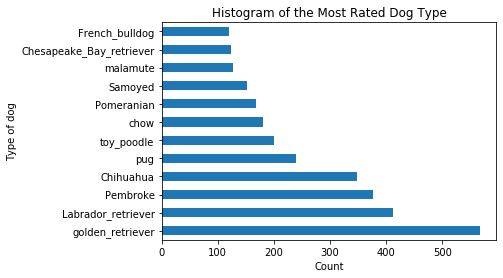

In [288]:
df_dog_type = df_final.groupby('dog_type').filter(lambda x: len(x) >= 120)

df_dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight')

In [289]:
df_dog_type_mean = df_final.groupby('dog_type').mean()

In [291]:
df_dog_type_mean['rating_numerator']

dog_type
Afghan_hound                       8.000000
Airedale                           9.833333
American_Staffordshire_terrier    10.312500
Appenzeller                       11.000000
Australian_terrier                11.500000
                                    ...    
toy_poodle                        11.020000
toy_terrier                       10.333333
vizsla                            10.846154
whippet                           10.181818
wire-haired_fox_terrier           11.500000
Name: rating_numerator, Length: 113, dtype: float64

In [292]:
print(df_final.loc[df_final.dog_type == 'Japanese_spaniel', 'url'])

1214    https://t.co/IoLRvF0Kak
2839    https://t.co/IoLRvF0Kak
4464    https://t.co/IoLRvF0Kak
6089    https://t.co/IoLRvF0Kak
Name: url, dtype: object


In [390]:
# Golden Retriever is the most common dog in the dataset
df_final[df_final['dog_type'] == 'golden_retriever']

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,date,jpg_url,dog_type,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
13,889531135344209921,This is Stuart. He's sporting his favorite fan...,13.0,10.0,Stuart,None,2017,7,2017-07-24,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,golden_retriever,0.953442,14204.0,2059.0,8780137.0,16.0,Twitter for iPhone,Original tweet,https://t.co/Ya3bdfYuCx
15,888917238123831296,This is Jim. He found a fren. Taught him how t...,12.0,10.0,Jim,None,2017,7,2017-07-23,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,golden_retriever,0.714719,27322.0,4110.0,8780137.0,16.0,Twitter for iPhone,Original tweet,https://t.co/chxruIOUJN
16,888804989199671297,This is Zeke. He has a new stick. Very proud o...,13.0,10.0,Zeke,None,2017,7,2017-07-22,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,golden_retriever,0.46976,24012.0,3877.0,8780137.0,16.0,Twitter for iPhone,Original tweet,https://t.co/L5cCoR2huQ
35,883482846933004288,This is Bella. She hopes her smile made you sm...,13.5,10.0,Bella,None,2017,7,2017-07-08,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,golden_retriever,0.943082,43016.0,9029.0,8780138.0,16.0,Twitter for iPhone,Original tweet,https://t.co/qjrljjt948
37,883117836046086144,Please only send dogs. We don't rate mechanics...,13.0,10.0,None,None,2017,7,2017-07-07,https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg,golden_retriever,0.949562,34843.0,6069.0,8780138.0,16.0,Twitter for iPhone,Original tweet,https://t.co/Se5fZ9wp5E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6448,667160273090932737,This is Bradlay. He is a Ronaldinho Matsuyama ...,11.0,10.0,Bradlay,None,2015,11,2015-11-19,https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg,golden_retriever,0.471351,248.0,60.0,8780181.0,16.0,Twitter for iPhone,Original tweet,https://t.co/DKhgkMx4N1
6455,667044094246576128,12/10 gimme now https://t.co/QZAnwgnOMB,12.0,10.0,None,None,2015,11,2015-11-18,https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg,golden_retriever,0.765266,176.0,47.0,8780182.0,16.0,Twitter for iPhone,Original tweet,https://t.co/QZAnwgnOMB
6480,666345417576210432,Look at this jokester thinking seat belt laws ...,10.0,10.0,None,None,2015,11,2015-11-16,https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg,golden_retriever,0.858744,275.0,128.0,8780182.0,16.0,Twitter for iPhone,Original tweet,https://t.co/VFKG1vxGjB
6490,666063827256086533,This is the happiest dog you will ever see. Ve...,10.0,10.0,the,None,2015,11,2015-11-16,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,golden_retriever,0.77593,447.0,198.0,8780183.0,16.0,Twitter for iPhone,Original tweet,https://t.co/RhUEAloehK


In [391]:
df_dog_type_count = df_final.groupby('dog_type').count()
df_dog_type_count

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,date,jpg_url,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
dog_type,,,,,,,,,,,,,,,,,,
Afghan_hound,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Airedale,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48
American_Staffordshire_terrier,64,64,64,64,64,64,64,64,64,64,64,60,60,60,60,60,60,60
Appenzeller,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Australian_terrier,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
toy_poodle,200,200,200,200,200,200,200,200,200,200,200,196,196,196,196,196,196,196
toy_terrier,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
vizsla,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52


In [392]:
dog_type_count = df_dog_type_count['rating_numerator']
dog_type_mean = df_dog_type_mean['rating_numerator']
dog_type_mean

dog_type
Afghan_hound                       8.000000
Airedale                           9.833333
American_Staffordshire_terrier    10.312500
Appenzeller                       11.000000
Australian_terrier                11.500000
                                    ...    
toy_poodle                        11.020000
toy_terrier                       10.333333
vizsla                            10.846154
whippet                           10.181818
wire-haired_fox_terrier           11.500000
Name: rating_numerator, Length: 113, dtype: float64

In [393]:
df2 = pd.DataFrame()
df2['dog_type_count'] = dog_type_count
df2['dog_type_mean'] = dog_type_mean
df2

,dog_type_count,dog_type_mean
dog_type,,
Afghan_hound,8,8.000000
Airedale,48,9.833333
American_Staffordshire_terrier,64,10.312500
Appenzeller,8,11.000000
Australian_terrier,8,11.500000
...,...,...
toy_poodle,200,11.020000
toy_terrier,12,10.333333
vizsla,52,10.846154


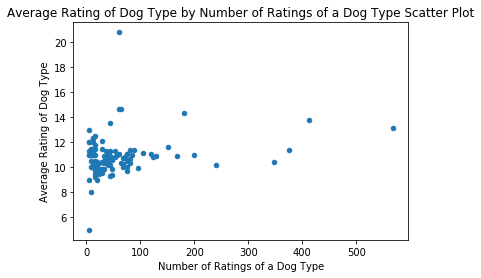

In [394]:
df2.plot(x='dog_type_count', y='dog_type_mean', kind='scatter')
plt.xlabel('Number of Ratings of a Dog Type')
plt.ylabel('Average Rating of Dog Type')
plt.title('Average Rating of Dog Type by Number of Ratings of a Dog Type Scatter Plot')

fig = plt.gcf() 
fig.savefig('output2.png',bbox_inches='tight')

In [395]:
df_final.rating_numerator.describe()

count    6500.000000
mean       11.389711
std         8.012700
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max       165.000000
Name: rating_numerator, dtype: float64